## Data Prep:

1. Read in the data and apply your data prep function to it.

In [2]:
import pandas as pd
import numpy as np

In [3]:
def income_model_prep(data):
    from sklearn.model_selection import train_test_split
    data = pd.get_dummies(
        data.assign(
            target = np.where(data["SalStat"] == " less than or equal to 50,000", 0, 1),
            nativecountry = data["nativecountry"].replace({" Holand-Netherlands": " Germany"}),
            occupation = data["occupation"].replace({" Armed-Forces": " ?"}),
            JobType = data["JobType"].replace({" Never-worked": " Without-pay"}),
        ).drop("SalStat", axis=1), 
        drop_first=True
    )
    X = data.drop("target", axis=1)
    y = data["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

In [4]:
income = pd.read_csv("../Data/income.csv")

X_train, X_test, y_train, y_test = income_model_prep(income)

## Assignment 1:

1. Scale your feature data frames
2. Fit a KNN model with k = 5, using the features `age` and `hoursperweek`
3. Print the model accuracy score and confusion matrix for both the training and test data
4. Using the test data, create a scatterplot with `age` in the x-axis, `hoursperweek` in the y-axis, and color each point with the predicted class.

In [5]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_std = std.fit_transform(X_train[["age", "hoursperweek"]])
X_test_std = std.transform(X_test[["age", "hoursperweek"]])

In [6]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(f"Train Accuracy: {accuracy_score(y_train, knn.predict(X_train_std))}")
print(f"Test Accuracy: {accuracy_score(y_test, knn.predict(X_test_std))}")

Train Accuracy: 0.7538112735517161
Test Accuracy: 0.7437460913070669


In [9]:
print(confusion_matrix(y_train, knn.predict(X_train_std)))
print(confusion_matrix(y_test, knn.predict(X_test_std)))

[[17236  2166]
 [ 4132  2048]]
[[4307  574]
 [1065  450]]


<Axes: xlabel='age', ylabel='hoursperweek'>

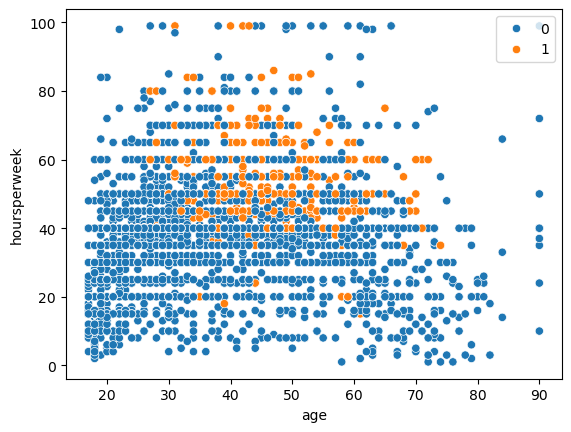

In [10]:
import seaborn as sns

sns.scatterplot(x=X_test["age"], y=X_test["hoursperweek"], hue=knn.predict(X_test_std))

## Assignment 2: 

1. Fit a KNN with all features and k=5. Print train and test accuracy.
2. Use GridSearchCV to find the optimal value for k, then print test accuracy and the confusion matrix.

In [14]:
from sklearn.preprocessing import StandardScaler

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [16]:
print(f"Train Accuracy: {accuracy_score(y_train, knn.predict(X_train_std))}")
print(f"Test Accuracy: {accuracy_score(y_test, knn.predict(X_test_std))}")

Train Accuracy: 0.8745602376671097
Test Accuracy: 0.8245778611632271


In [17]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": range(1, 50)}

gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)

gridsearch.fit(X_train_std, y_train)

gridsearch.best_params_

{'n_neighbors': 25}

In [18]:
k = 25
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=25)

In [19]:
print(f"Train Accuracy: {accuracy_score(y_train, knn.predict(X_train_std))}")
print(f"Test Accuracy: {accuracy_score(y_test, knn.predict(X_test_std))}")

Train Accuracy: 0.8412164803377374
Test Accuracy: 0.8281738586616635


In [20]:
print(confusion_matrix(y_test, knn.predict(X_test_std)))

[[4474  407]
 [ 692  823]]
